In [33]:
#Import Important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

work_directory=os.getcwd()
path=work_directory+"/titanic_train.csv"
train=pd.read_csv(path)

In [34]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [36]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

<Axes: >

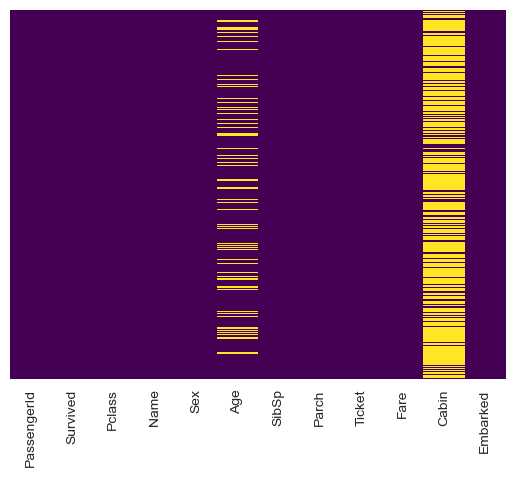

In [38]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap="viridis")

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for 
reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like 
we are just missing too much of that data to do something useful with at a basic level. 
We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

<Axes: xlabel='Survived', ylabel='count'>

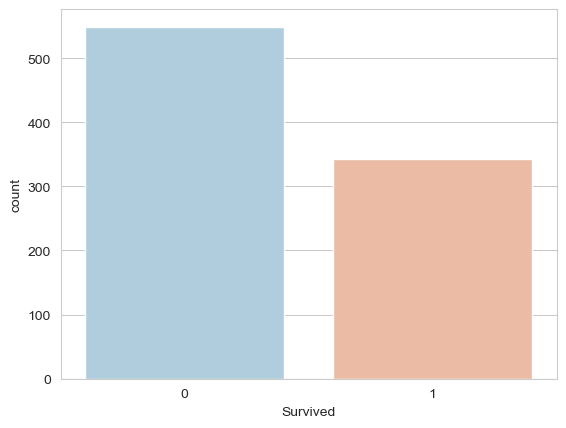

In [39]:
sns.set_style("whitegrid")
sns.countplot(x="Survived", data=train, palette="RdBu_r")

In [40]:
train["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

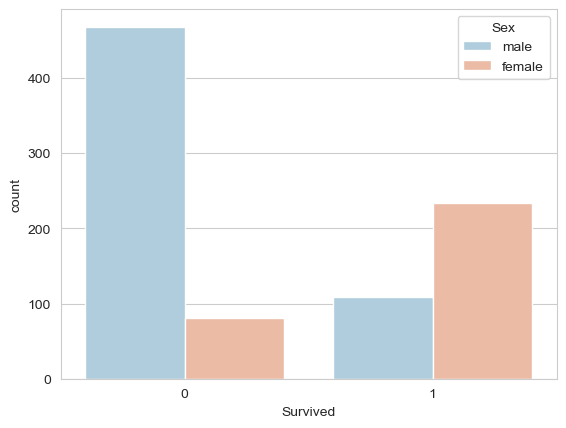

In [41]:
sns.set_style("whitegrid")
sns.countplot(x="Survived", data=train, hue="Sex", palette="RdBu_r")

<Axes: xlabel='Survived', ylabel='count'>

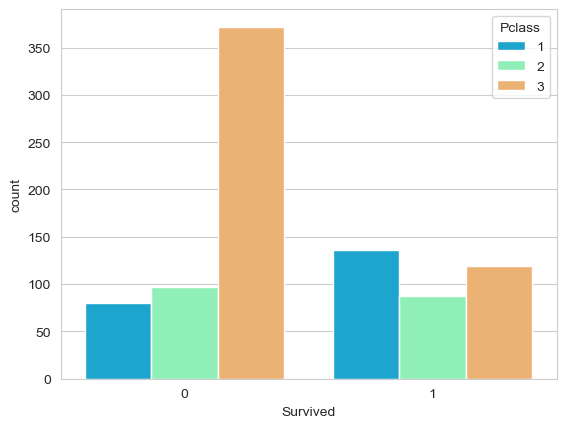

In [42]:
sns.set_style("whitegrid")
sns.countplot(x="Survived", data=train, hue="Pclass", palette="rainbow")

<Axes: xlabel='Age', ylabel='Count'>

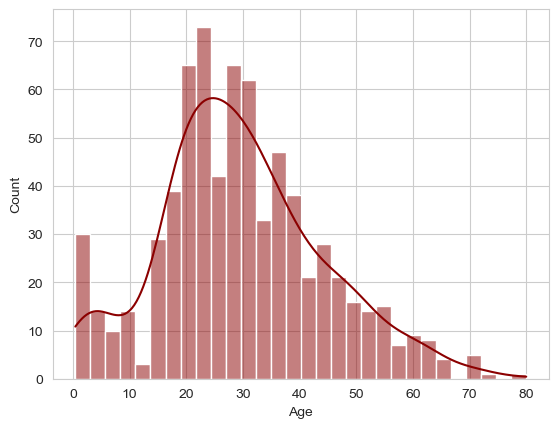

In [43]:
sns.histplot(train["Age"].dropna(), kde=True, color="darkred", bins=30)

<Axes: >

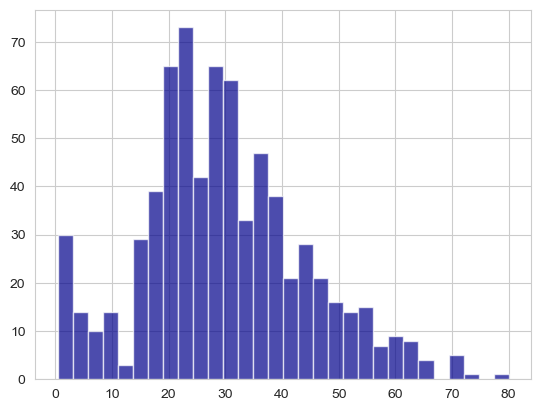

In [44]:
train["Age"].hist(bins=30, color="darkblue", alpha=0.7)

<Axes: xlabel='SibSp', ylabel='count'>

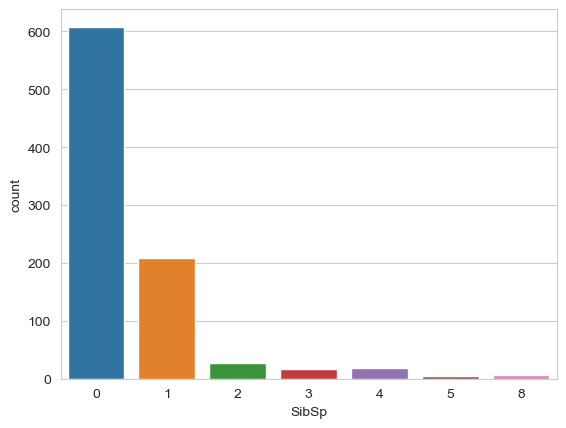

In [45]:
sns.countplot(x="SibSp", data=train)

<Axes: >

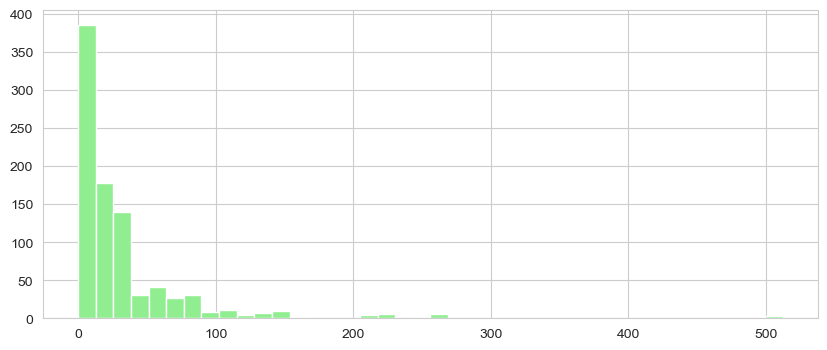

In [46]:
train["Fare"].hist(color="lightgreen", bins=40, figsize=(10,4))

# Data Cleaning

We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is 
by filling in the mean age of all the passengers (imputation). However we can be smarter about 
this and check the average age by passenger class. For example:

<Axes: xlabel='Pclass', ylabel='Age'>

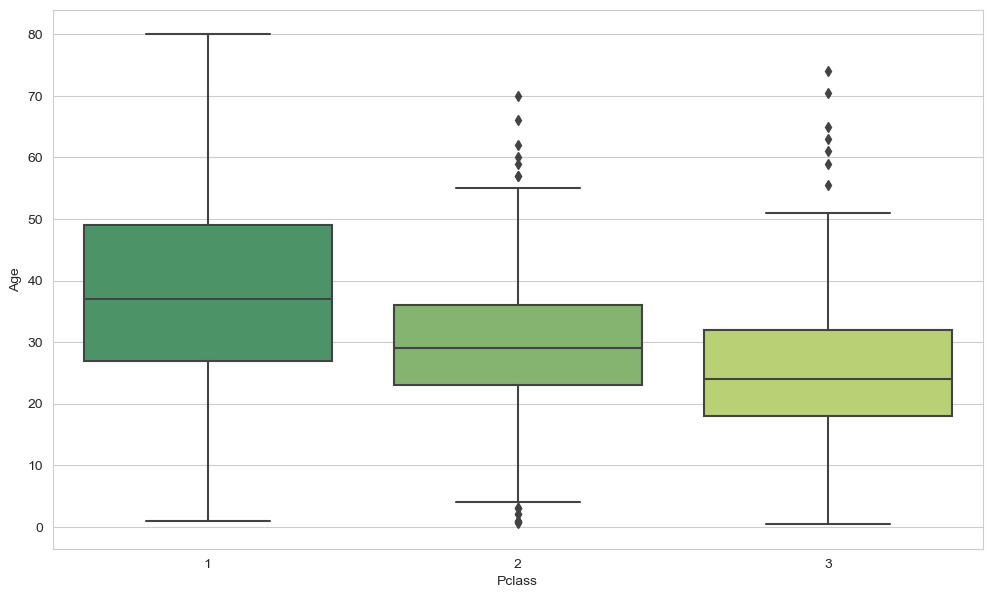

In [47]:
plt.figure(figsize=(12,7))
sns.boxplot(x="Pclass", y="Age", data=train, palette="summer")

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. 
We'll use these average age values to impute based on Pclass for Age.

In [48]:
def impute_age(cols):
    Age= cols[0]
    Pclass= cols[1]
    
    if pd.isnull(Age):
        if Pclass ==1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age

Now we apply that function!

In [49]:
train["Age"]=train[["Age", "Pclass"]].apply(impute_age,axis=1)

Now let's check that heat map again!

<Axes: >

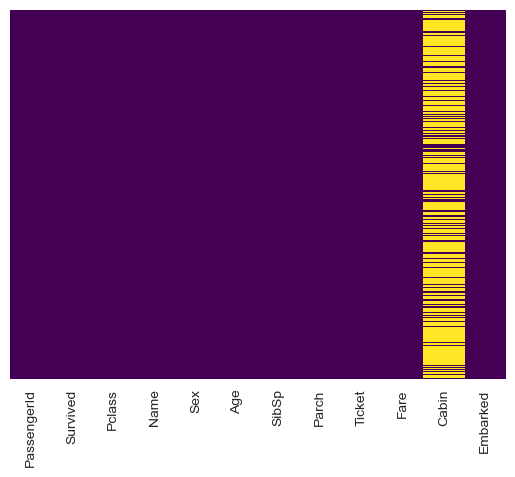

In [50]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap="viridis")

Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [51]:
train.drop("Cabin", axis=1, inplace=True)

In [52]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [53]:
train.dropna(inplace=True)

In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [55]:
sex=pd.get_dummies(train["Sex"],drop_first=True)
embark=pd.get_dummies(train["Embarked"],drop_first=True)

In [56]:
train.drop(["Sex","Embarked","Name","Ticket"],axis=1,inplace=True)

In [57]:
rawdf=pd.concat([train,sex,embark],axis=1)

In [58]:
rawdf.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [59]:
train.shape

(889, 7)

In [60]:
rawdf.shape

(889, 10)

In [62]:
rawdf.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'male', 'Q', 'S'],
      dtype='object')

In [63]:
#split the data set
from sklearn.model_selection import train_test_split

In [64]:
trainDf,testDf=train_test_split(rawdf,train_size=0.7,random_state=2410)

In [65]:
trainDf.shape

(622, 10)

In [66]:
testDf.shape

(267, 10)

In [67]:
# splitting into dep & idep var
trainX=trainDf.drop("Survived",axis=1)
trainY=trainDf["Survived"]
testX=testDf.drop("Survived",axis=1)
testY=testDf["Survived"]

In [68]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(622, 9)
(622,)
(267, 9)
(267,)


In [70]:
#Model Building
from sklearn.linear_model import LogisticRegression

In [71]:
lg=LogisticRegression().fit(trainX,trainY)

/Users/wizard/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [72]:
#Prediction
testPredict=lg.predict(testX)

In [73]:
print(testPredict[0:5])
print(testY[0:5])

[1 0 1 0 1]
141    1
45     0
608    1
331    0
186    1
Name: Survived, dtype: int64


In [75]:
#Evaluation Matrix
from sklearn.metrics import confusion_matrix,classification_report

In [76]:
print(confusion_matrix(testY,testPredict))

[[138  24]
 [ 33  72]]


In [77]:
print(classification_report(testY,testPredict))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       162
           1       0.75      0.69      0.72       105

    accuracy                           0.79       267
   macro avg       0.78      0.77      0.77       267
weighted avg       0.78      0.79      0.78       267

